In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

In [2]:
data = 'C:/Users/Владимир/Desktop/МатПрак 6 сем/copy-of-weather-prediction23/weatherAUS_train.csv'

df = pd.read_csv(data)

In [3]:
df.shape

(101822, 23)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2013-07-22,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,...,54.0,28.0,1019.4,1016.3,2.0,2.0,12.2,16.6,No,0
1,2015-02-28,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,...,84.0,66.0,1008.1,1005.1,8.0,8.0,18.8,24.3,No,1
2,2009-11-18,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,...,68.0,91.0,1001.5,1000.1,7.0,8.0,20.1,16.5,Yes,1
3,2014-02-19,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,...,97.0,97.0,1004.6,1002.1,NaN,NaN,22.6,22.3,No,1
4,2015-10-04,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,...,46.0,15.0,1022.8,1020.7,NaN,NaN,22.1,32.6,No,0


In [5]:
col_names = df.columns

print(col_names)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101822 entries, 0 to 101821
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           101822 non-null  object 
 1   Location       101822 non-null  object 
 2   MinTemp        100795 non-null  float64
 3   MaxTemp        100947 non-null  float64
 4   Rainfall       99522 non-null   float64
 5   Evaporation    57933 non-null   float64
 6   Sunshine       53022 non-null   float64
 7   WindGustDir    94504 non-null   object 
 8   WindGustSpeed  94550 non-null   float64
 9   WindDir9am     94431 non-null   object 
 10  WindDir3pm     98836 non-null   object 
 11  WindSpeed9am   100550 non-null  float64
 12  WindSpeed3pm   99663 non-null   float64
 13  Humidity9am    99968 non-null   float64
 14  Humidity3pm    98662 non-null   float64
 15  Pressure9am    91268 non-null   float64
 16  Pressure3pm    91304 non-null   float64
 17  Cloud9am       62833 non-null

In [7]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n',categorical)

There are 6 categorical variables

The categorical variables are :
 ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1027
MaxTemp            875
Rainfall          2300
Evaporation      43889
Sunshine         48800
WindGustDir       7318
WindGustSpeed     7272
WindDir9am        7391
WindDir3pm        2986
WindSpeed9am      1272
WindSpeed3pm      2159
Humidity9am       1854
Humidity3pm       3160
Pressure9am      10554
Pressure3pm      10518
Cloud9am         38989
Cloud3pm         41420
Temp9am           1226
Temp3pm           2518
RainToday         2300
RainTomorrow         0
dtype: int64

In [9]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3408  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101822 entries, 0 to 101821
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           101822 non-null  datetime64[ns]
 1   Location       101822 non-null  object        
 2   MinTemp        100795 non-null  float64       
 3   MaxTemp        100947 non-null  float64       
 4   Rainfall       99522 non-null   float64       
 5   Evaporation    57933 non-null   float64       
 6   Sunshine       53022 non-null   float64       
 7   WindGustDir    94504 non-null   object        
 8   WindGustSpeed  94550 non-null   float64       
 9   WindDir9am     94431 non-null   object        
 10  WindDir3pm     98836 non-null   object        
 11  WindSpeed9am   100550 non-null  float64       
 12  WindSpeed3pm   99663 non-null   float64       
 13  Humidity9am    99968 non-null   float64       
 14  Humidity3pm    98662 non-null   float64       
 15  

In [13]:
df = df.drop(columns = ['Date'])

In [14]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,W,...,1016.3,2.0,2.0,12.2,16.6,No,0,2013,7,22
1,Sale,15.4,25.7,0.0,NaN,NaN,W,67.0,NNE,WSW,...,1005.1,8.0,8.0,18.8,24.3,No,1,2015,2,28
2,PerthAirport,15.2,22.2,7.2,5.2,3.3,NW,78.0,NW,WSW,...,1000.1,7.0,8.0,20.1,16.5,Yes,1,2009,11,18
3,Richmond,19.9,26.4,0.0,2.8,NaN,SW,24.0,NNE,WSW,...,1002.1,NaN,NaN,22.6,22.3,No,1,2014,2,19
4,Wollongong,19.3,32.9,0.0,NaN,NaN,W,48.0,NNW,W,...,1020.7,NaN,NaN,22.1,32.6,No,0,2015,10,4


In [15]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n',categorical)

There are 5 categorical variables

The categorical variables are :
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [16]:
pd.get_dummies(df.Location, drop_first=True).shape

(101822, 48)

In [17]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).shape

(101822, 16)

In [18]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).shape

(101822, 16)

In [19]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).shape

(101822, 16)

In [20]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).shape

(101822, 2)

In [21]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 20 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow', 'Year', 'Month', 'Day']


In [22]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  100795.0  100947.0   99522.0      57933.0   53022.0        94550.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        32.0      48.0     368.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      100550.0       99663.0      99968.0      98662.0      91268.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

Text(0, 0.5, 'RainTomorrow')

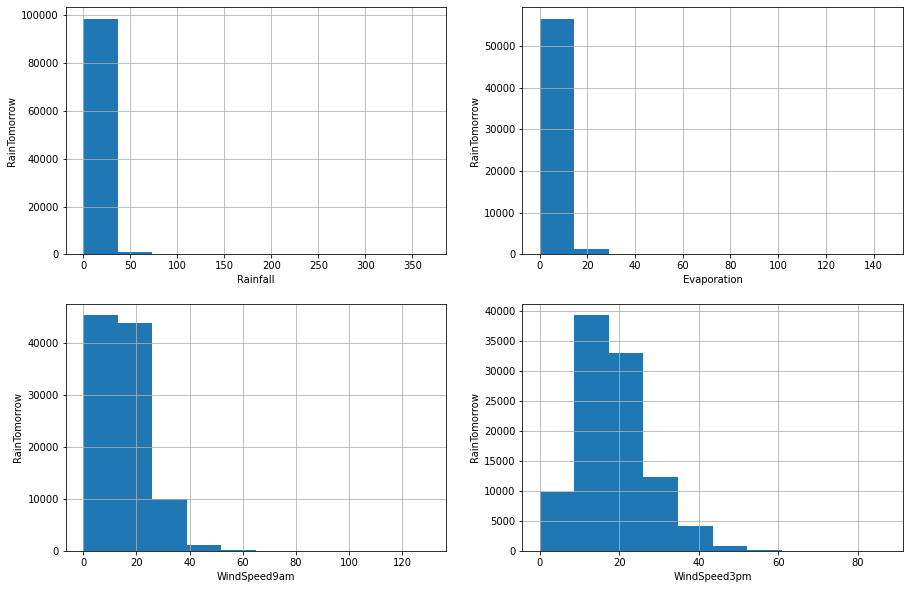

In [23]:

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

START ALGORITHM

In [24]:
X = df.drop(columns = ['RainTomorrow'] )
Y = df['RainTomorrow']

In [25]:
from sklearn.model_selection import train_test_split
#data = 'C:/Users/Владимир/Desktop/МатПрак 6 сем/copy-of-weather-prediction23/weatherAUS_train.csv'
#C:\Users\Владимир\Desktop\МатПрак 6 сем\copy-of-weather-prediction23
#df = pd.read_csv(data)

data_1 = 'C:/Users/Владимир/Desktop/МатПрак 6 сем/copy-of-weather-prediction23/weatherAUS_test.csv'
data_2 = 'C:/Users/Владимир/Desktop/МатПрак 6 сем/copy-of-weather-prediction23/weatherAUS_test_sample_solution.csv'

X_train = X
X_test = pd.read_csv(data_1)

X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Year'] = X_test['Date'].dt.year
X_test['Month'] = X_test['Date'].dt.month
X_test['Day'] = X_test['Date'].dt.day
X_test = X_test.drop(columns = ['Date'])


y_train = Y
y_test = pd.read_csv(data_2)
y_test = y_test.drop(columns = ['Id'])

In [26]:
y_test.head()

,RainTomorrow
0,1
1,0
2,1
3,0
4,1


In [27]:
X_train.shape, X_test.shape

((101822, 24), (43638, 25))

In [28]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']


In [29]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [30]:
X_train[numerical].isnull().sum()

MinTemp           1027
MaxTemp            875
Rainfall          2300
Evaporation      43889
Sunshine         48800
WindGustSpeed     7272
WindSpeed9am      1272
WindSpeed3pm      2159
Humidity9am       1854
Humidity3pm       3160
Pressure9am      10554
Pressure3pm      10518
Cloud9am         38989
Cloud3pm         41420
Temp9am           1226
Temp3pm           2518
Year                 0
Month                0
Day                  0
dtype: int64

In [31]:
X_test[numerical].isnull().sum()

MinTemp            458
MaxTemp            386
Rainfall           961
Evaporation      18901
Sunshine         21035
WindGustSpeed     2991
WindSpeed9am       495
WindSpeed3pm       903
Humidity9am        800
Humidity3pm       1347
Pressure9am       4511
Pressure3pm       4510
Cloud9am         16899
Cloud3pm         17938
Temp9am            541
Temp3pm           1091
Year                 0
Month                0
Day                  0
dtype: int64

In [32]:
for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [33]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [34]:
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [35]:
X_test.isnull().sum()

Id               0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

THE FIGHT AGANIST EMISSIONS

In [36]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


In [37]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [38]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [39]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [40]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [41]:
X_train['RainToday']

0          No
1          No
2         Yes
3          No
4          No
         ... 
101817    Yes
101818     No
101819    Yes
101820    Yes
101821     No
Name: RainToday, Length: 101822, dtype: object

In [42]:
X_train['RainToday_0'] = np.zeros(X_train['RainToday'].shape[0], dtype=int)
X_train['RainToday_1'] = np.zeros(X_train['RainToday'].shape[0], dtype=int)

In [43]:
X_test['RainToday_0'] = np.zeros(X_test['RainToday'].shape[0], dtype=int)
X_test['RainToday_1'] = np.zeros(X_test['RainToday'].shape[0], dtype=int)

In [44]:
X_train.loc[X_train['RainToday'] == 'No', 'RainToday_0'] = 1
X_train.loc[X_train['RainToday'] == 'Yes', 'RainToday_1'] = 1

In [45]:
X_test.loc[X_test['RainToday'] == 'No', 'RainToday_0'] = 1
X_test.loc[X_test['RainToday'] == 'Yes', 'RainToday_1'] = 1

In [46]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Year,Month,Day,RainToday_0,RainToday_1
0,Sydney,8.7,17.2,0.0,3.8,9.9,WNW,54.0,WNW,W,...,2.0,2.0,12.2,16.6,No,2013,7,22,1,0
1,Sale,15.4,25.7,0.0,4.8,8.4,W,67.0,NNE,WSW,...,8.0,8.0,18.8,24.3,No,2015,2,28,1,0
2,PerthAirport,15.2,22.2,3.2,5.2,3.3,NW,78.0,NW,WSW,...,7.0,8.0,20.1,16.5,Yes,2009,11,18,0,1
3,Richmond,19.9,26.4,0.0,2.8,8.4,SW,24.0,NNE,WSW,...,5.0,5.0,22.6,22.3,No,2014,2,19,1,0
4,Wollongong,19.3,32.9,0.0,4.8,8.4,W,48.0,NNW,W,...,5.0,5.0,22.1,32.6,No,2015,10,4,1,0


In [47]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [48]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,8.7,17.2,0.0,3.8,9.9,54.0,17.0,26.0,54.0,28.0,...,0,0,0,0,0,0,0,1,0,0
1,15.4,25.7,0.0,4.8,8.4,67.0,11.0,9.0,84.0,66.0,...,0,0,0,0,0,0,0,0,0,1
2,15.2,22.2,3.2,5.2,3.3,78.0,33.0,28.0,68.0,91.0,...,0,0,0,0,0,0,0,0,0,1
3,19.9,26.4,0.0,2.8,8.4,24.0,13.0,9.0,97.0,97.0,...,0,0,0,0,0,0,0,0,0,1
4,19.3,32.9,0.0,4.8,8.4,48.0,19.0,22.0,46.0,15.0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [50]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,...,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000
mean,12.206425,23.218907,0.669227,5.144617,7.986876,39.966589,14.046483,18.685333,68.918338,51.551924,...,0.054144,0.059663,0.068109,0.104339,0.064573,0.055676,0.064200,0.068973,0.061784,0.065143
std,6.361958,7.078532,1.180092,2.808078,2.751346,13.102661,8.824679,8.692966,18.808958,20.442272,...,0.226302,0.236862,0.251934,0.305701,0.245773,0.229295,0.245111,0.253410,0.240765,0.246779
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.200000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.900000,48.100000,3.200000,21.800000,14.300000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
cols = X_train.columns

In [52]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [54]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,...,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000,101822.000000
mean,0.512535,0.529658,0.209133,0.235992,0.558523,0.257551,0.255391,0.327813,0.686044,0.515519,...,0.054144,0.059663,0.068109,0.104339,0.064573,0.055676,0.064200,0.068973,0.061784,0.065143
std,0.157474,0.133810,0.368779,0.128811,0.192402,0.102365,0.160449,0.152508,0.189989,0.204423,...,0.226302,0.236862,0.251934,0.305701,0.245773,0.229295,0.245111,0.253410,0.240765,0.246779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.192661,0.573427,0.187500,0.127273,0.228070,0.565657,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.220183,0.587413,0.250000,0.236364,0.333333,0.696970,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.247706,0.601399,0.304688,0.345455,0.421053,0.828283,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [56]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.5020


In [60]:
X_test.shape

(43638, 118)

In [61]:
X_train.shape

(101822, 118)

In [63]:
indeces = np.arange(len(y_test))
data_ = {'Id':indeces, 'RainTomorrow':y_pred_test}

result = pd.DataFrame(data = data_)
result.to_csv('project_Home_2.csv', index=False)